In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf


In [2]:
data=pd.read_csv(r'C:\\Users\hp\Documents\archive\heart.csv')

In [3]:
data.head()
print(len(data))

1025


array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

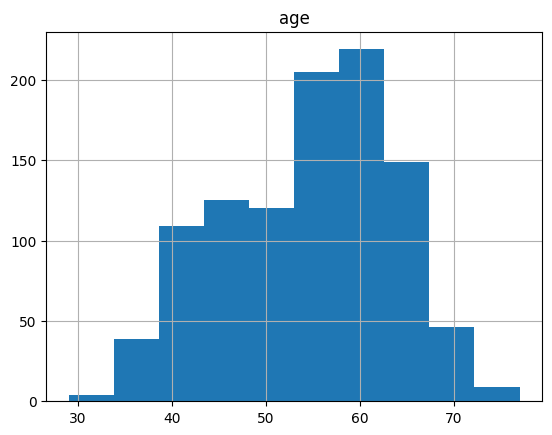

In [4]:
data.hist(column="age")

# Creating an input data separately to add  the noise

In [5]:
new_data=data.loc[:, data.columns!='target']

In [6]:
new_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [7]:
#generating Gaussian noise parameters
mu=5.0
sigma = 0.5
#generating Gaussian noise
Gaussian_noise= np.random.normal(mu, sigma)

#we varied mu and sigma and saw how it affected performance of the model

In [8]:
print(Gaussian_noise)

5.49985263894494


In [9]:
#adding noise to  original data
new_data= new_data + Gaussian_noise

In [10]:
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.499853,6.499853,5.499853,130.499853,217.499853,5.499853,6.499853,173.499853,5.499853,6.499853,7.499853,7.499853,8.499853
1,58.499853,6.499853,5.499853,145.499853,208.499853,6.499853,5.499853,160.499853,6.499853,8.599853,5.499853,5.499853,8.499853
2,75.499853,6.499853,5.499853,150.499853,179.499853,5.499853,6.499853,130.499853,6.499853,8.099853,5.499853,5.499853,8.499853
3,66.499853,6.499853,5.499853,153.499853,208.499853,5.499853,6.499853,166.499853,5.499853,5.499853,7.499853,6.499853,8.499853
4,67.499853,5.499853,5.499853,143.499853,299.499853,6.499853,6.499853,111.499853,5.499853,7.399853,6.499853,8.499853,7.499853


array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

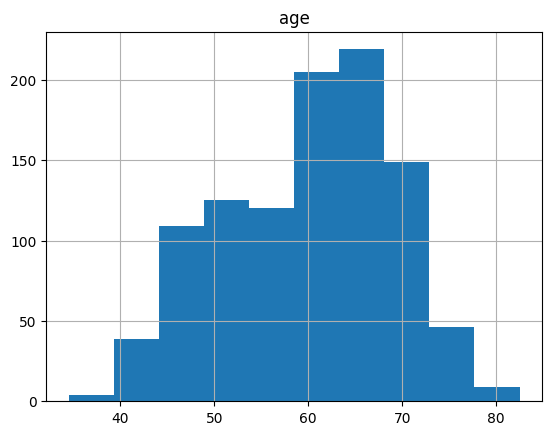

In [11]:
new_data.hist(column="age")

# Creating training and testing data

In [12]:
X = np.array(new_data)
y = np.array(data['target'])

In [13]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [14]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [15]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()
print(Y_train_binary)

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0
 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 1 0 1 0 1 1 1 0 1 

# Create model

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
82/82 [==============================] - 1s 5ms/step - loss: 0.6586 - accuracy: 0.6890 - val_loss: 0.5985 - val_accuracy: 0.7854
Epoch 2/50
82/82 [==============================] - 0s 3ms/step - loss: 0.5405 - accuracy: 0.8244 - val_loss: 0.4722 - val_accuracy: 0.8244
Epoch 3/50
82/82 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8317 - val_loss: 0.3975 - val_accuracy: 0.8341
Epoch 4/50
82/82 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.8500 - val_loss: 0.3615 - val_accuracy: 0.8439
Epoch 5/50
82/82 [==============================] - 0s 3ms/step - loss: 0.3779 - accuracy: 0.8573 - val_loss: 0.3434 - val_accuracy: 0.8585
Epoch 6/50
82/82 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8585 - val_loss: 0.3325 - val_accuracy: 0.8683
Epoch 7/50
82/82 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8549 - val_loss: 0.3278 - val_accuracy: 0.8683
Epoch 8/50
82/82 [==

# Testing accuracy

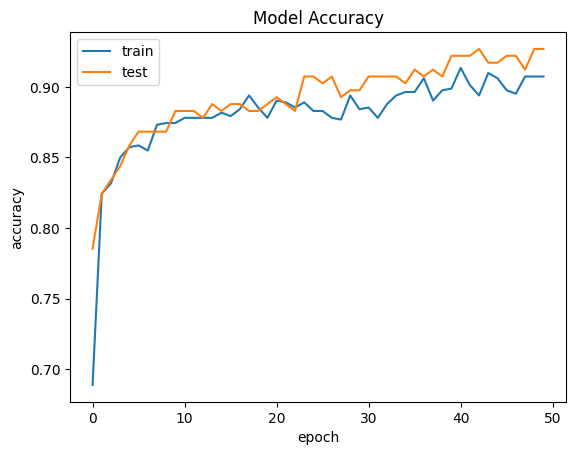

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

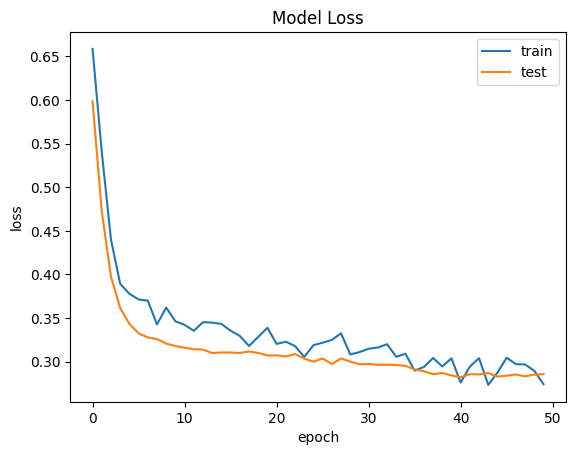

In [29]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [30]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

7/7 [==============================] - 0s 1ms/step
Results for Binary Model
0.926829268292683
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       100
           1       0.92      0.93      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

